In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Showing dataframe

mc = pd.read_csv('marketing_customer_analysis.csv')

cols = []
for i in range(len(mc.columns)): 
    cols.append(mc.columns[i].lower().replace(' ', '_'))
mc.columns = cols
mc

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
mc.isna().sum() 

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [4]:
# Describing dataframe

mc.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


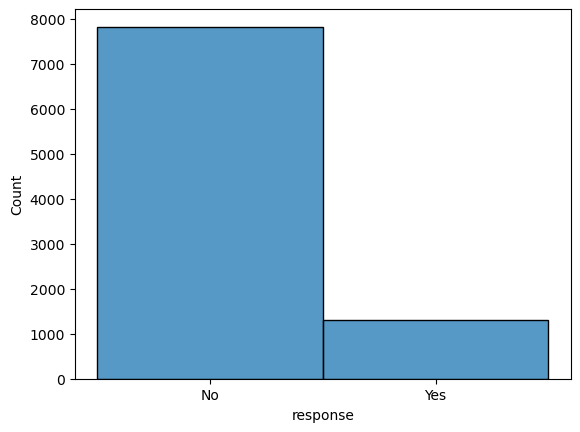

In [5]:
# Show a plot of the total number of responses

sns.histplot(mc['response']) 
plt.show()

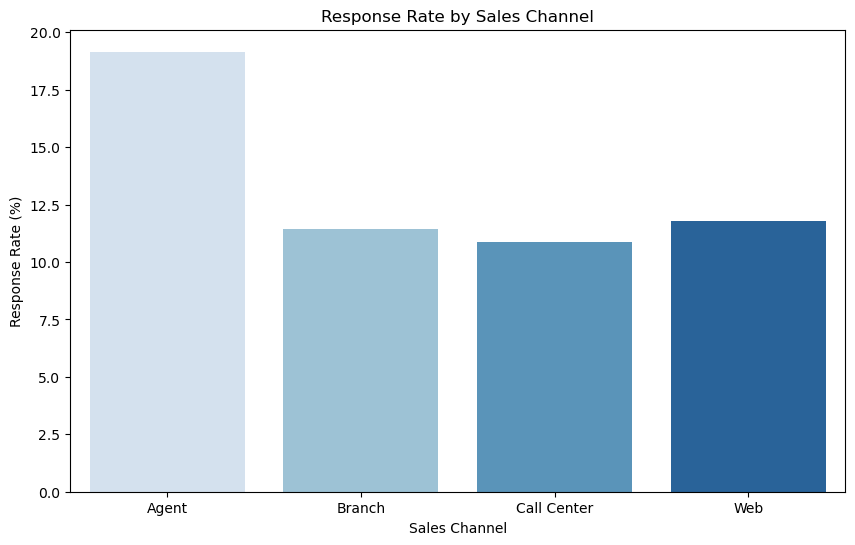

In [6]:
# Show a plot of the response rate by the sales channel.

mc_grouped = mc.groupby('sales_channel')['response'].value_counts(normalize=True).unstack().fillna(0)
mc_grouped['response_rate'] = mc_grouped['Yes'] * 100
mc_grouped.reset_index(inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_channel', y='response_rate', data=mc_grouped, palette="Blues")
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate (%)")
plt.title("Response Rate by Sales Channel")
plt.show()

In [7]:
# Show a plot of the response rate by the total claim amount

In [8]:
mc_grouped = mc.groupby('total_claim_amount')['response'].value_counts(normalize=True).unstack().fillna(0)
mc_grouped['response_rate'] = mc_grouped['Yes'] * 100
mc_grouped.reset_index(inplace=True)
mc_grouped

response,total_claim_amount,No,Yes,response_rate
0,0.099007,1.0,0.0,0.0
1,0.382107,1.0,0.0,0.0
2,0.423310,1.0,0.0,0.0
3,0.517753,1.0,0.0,0.0
4,0.769185,1.0,0.0,0.0
...,...,...,...,...
5101,2345.413441,1.0,0.0,0.0
5102,2452.894264,1.0,0.0,0.0
5103,2552.343856,1.0,0.0,0.0
5104,2759.794354,1.0,0.0,0.0


In [9]:
mc.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
total_claim_amount_bins = [-1, 500, 1500, 2000, 2500, 3000, 3500]
total_claim_amount_labels = ['<0','<500','<1500', '<2000', '<2500', '<3000']

mc_grouped['claim_amount_bins'] = pd.cut(mc_grouped['total_claim_amount'], bins=total_claim_amount_bins, labels=total_claim_amount_labels)


In [11]:
mc_grouped

response,total_claim_amount,No,Yes,response_rate,claim_amount_bins
0,0.099007,1.0,0.0,0.0,<0
1,0.382107,1.0,0.0,0.0,<0
2,0.423310,1.0,0.0,0.0,<0
3,0.517753,1.0,0.0,0.0,<0
4,0.769185,1.0,0.0,0.0,<0
...,...,...,...,...,...
5101,2345.413441,1.0,0.0,0.0,<2000
5102,2452.894264,1.0,0.0,0.0,<2000
5103,2552.343856,1.0,0.0,0.0,<2500
5104,2759.794354,1.0,0.0,0.0,<2500


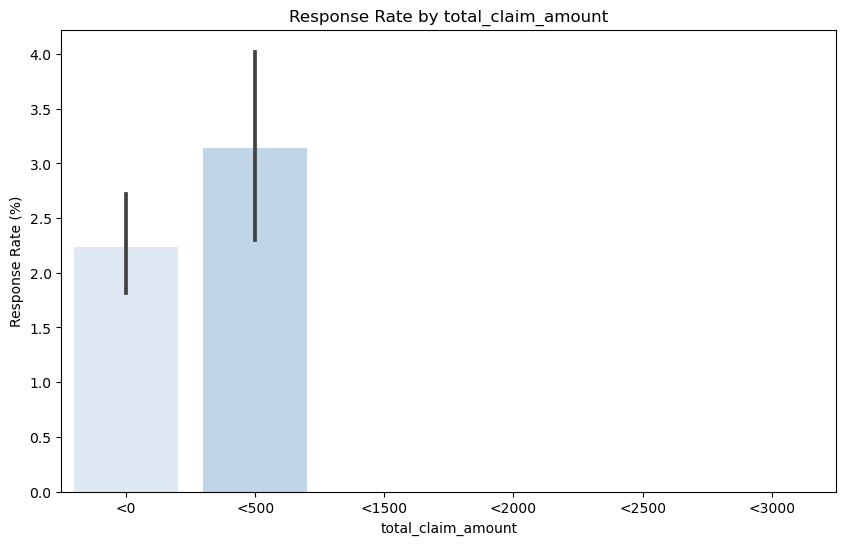

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='claim_amount_bins', y='response_rate', data=mc_grouped, palette="Blues")
plt.xlabel("total_claim_amount")
plt.ylabel("Response Rate (%)")
plt.title("Response Rate by total_claim_amount")
plt.show()


In [13]:
mc.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [14]:
# Show a plot of the response rate by income

In [33]:
mc_grouped

response,total_claim_amount,No,Yes,response_rate,claim_amount_bins,income,income_bins,income_amount_bins
0,0.099007,1.0,0.0,0.0,<0,56274,NaN,NaN
1,0.382107,1.0,0.0,0.0,<0,0,<0,<0
2,0.423310,1.0,0.0,0.0,<0,48767,NaN,NaN
3,0.517753,1.0,0.0,0.0,<0,0,<0,<0
4,0.769185,1.0,0.0,0.0,<0,43836,NaN,NaN
...,...,...,...,...,...,...,...,...
5101,2345.413441,1.0,0.0,0.0,<2000,52979,NaN,NaN
5102,2452.894264,1.0,0.0,0.0,<2000,55436,NaN,NaN
5103,2552.343856,1.0,0.0,0.0,<2500,32116,NaN,NaN
5104,2759.794354,1.0,0.0,0.0,<2500,56070,NaN,NaN


In [37]:
mc_groupedincome = mc.groupby('income')['response'].value_counts(normalize=True).unstack().fillna(0)
mc_groupedincome['response_rate'] = mc_groupedincome['Yes'] * 100
mc_groupedincome.reset_index(inplace=True)
mc_groupedincome

response,income,No,Yes,response_rate
0,0,0.914545,0.085455,8.545533
1,10037,1.000000,0.000000,0.000000
2,10074,1.000000,0.000000,0.000000
3,10097,1.000000,0.000000,0.000000
4,10105,1.000000,0.000000,0.000000
...,...,...,...,...
5689,99875,1.000000,0.000000,0.000000
5690,99934,1.000000,0.000000,0.000000
5691,99960,1.000000,0.000000,0.000000
5692,99961,1.000000,0.000000,0.000000


In [38]:
mc_groupedincome.describe()

response,income,No,Yes,response_rate
count,5694.000000,5694.000000,5694.000000,5694.000000
mean,51310.360555,0.967896,0.032104,3.210392
std,24156.833324,0.175703,0.175703,17.570263
min,0.000000,0.000000,0.000000,0.000000
25%,29504.250000,1.000000,0.000000,0.000000
50%,49171.500000,1.000000,0.000000,0.000000
75%,70773.500000,1.000000,0.000000,0.000000
max,99981.000000,1.000000,1.000000,100.000000


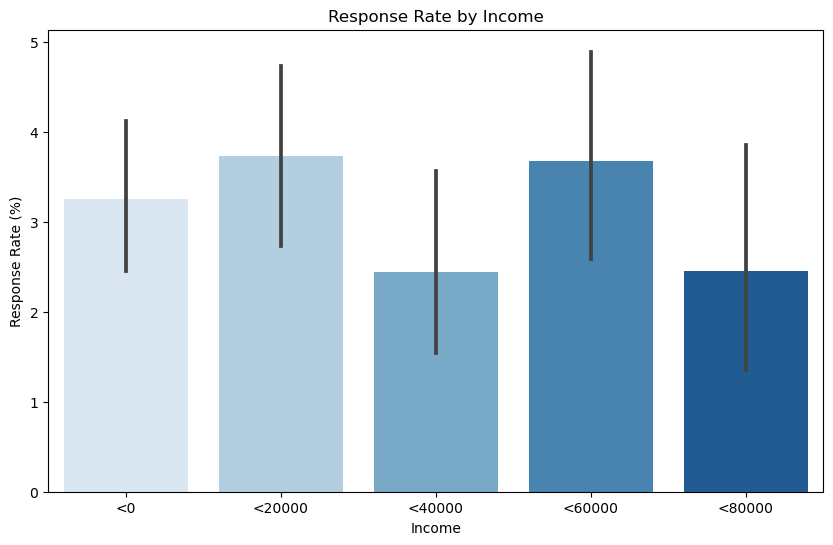

In [39]:
income_amount_bins = [-1, 20000, 40000, 60000, 80000, 10000000000]
income_amount_labels = ['<0', '<20000', '<40000', '<60000', '<80000']

mc_groupedincome['income_amount_bins'] = pd.cut(mc['income'], bins=income_amount_bins, labels=income_amount_labels)
plt.figure(figsize=(10, 6))
sns.barplot(x='income_amount_bins', y='response_rate', data=mc_groupedincome, palette="Blues")
plt.xlabel("Income")
plt.ylabel("Response Rate (%)")
plt.title("Response Rate by Income")
plt.show()

In [40]:
mc_groupedincome

response,income,No,Yes,response_rate,income_amount_bins
0,0,0.914545,0.085455,8.545533,<40000
1,10037,1.000000,0.000000,0.000000,<0
2,10074,1.000000,0.000000,0.000000,<40000
3,10097,1.000000,0.000000,0.000000,<0
4,10105,1.000000,0.000000,0.000000,<40000
...,...,...,...,...,...
5689,99875,1.000000,0.000000,0.000000,<80000
5690,99934,1.000000,0.000000,0.000000,<40000
5691,99960,1.000000,0.000000,0.000000,<0
5692,99961,1.000000,0.000000,0.000000,<60000
